In [2]:
import pandas as pd

In [3]:
bank0=pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Clustering using single feature

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
bank0[['Income_scaled','CCAvg_scaled']]=scaler.fit_transform(bank0[['Income','CCAvg']])
bank0[['Income_scaled','CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [79]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, random_state=42)
model.fit(bank0[['Income_scaled','CCAvg_scaled']])
bank0['clusters']=model.predict(bank0[['Income_scaled','CCAvg_scaled']])


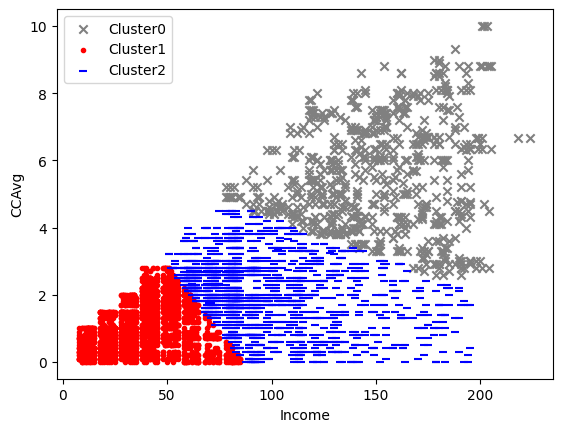

In [84]:
markers=['x','.','_']
color=['gray','red','blue']
import matplotlib.pyplot as plt
for clust in range(0,3):
    temp=bank0[bank0.clusters==clust]
    plt.scatter(temp['Income'],temp['CCAvg'],c=color[clust],marker=markers[clust],label='Cluster'+str(clust))
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [85]:
bank0.groupby('clusters')[['Income','CCAvg']].mean()


,Income,CCAvg
clusters,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


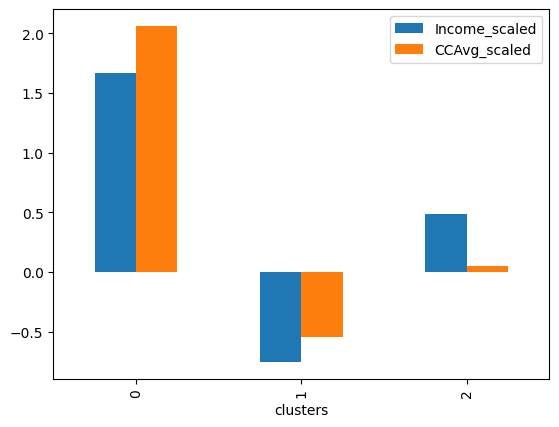

In [90]:
bank0.groupby('clusters')[['Income_scaled','CCAvg_scaled']].mean().plot.bar()
plt.show()

# Clustering using Multiple features

In [92]:
bank1=bank0.copy()
cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience','Mortgage']
bank1[cluster_cols]=scaler.fit_transform(bank1[cluster_cols])
bank1[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-2.131628e-18,-1.179501e-16,-5.613288e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


In [107]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(bank1[cluster_cols])
bank1['clusters']=model.predict(bank1[cluster_cols])

In [108]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca_res=pca.fit_transform(bank1[cluster_cols])
bank1['pc1']=pca_res[:,0]
bank1['pc2']=pca_res[:,1]


In [109]:
bank1['clusters'].value_counts()

0    2164
2    2027
1     809
Name: clusters, dtype: int64

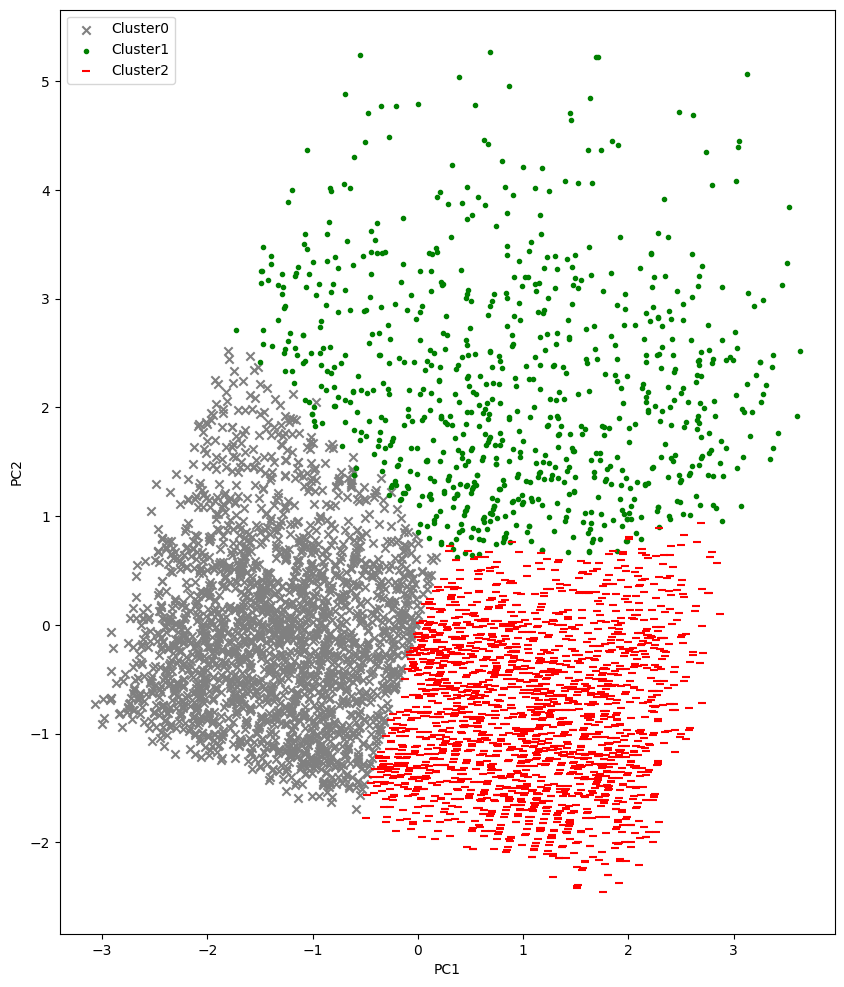

In [114]:
markers=['x','.','_']
color=['gray','green','red']
plt.figure(figsize=[10,12])
for clust in range(0,3):
    temp=bank1[bank1.clusters==clust]
    plt.scatter(temp.pc1,temp.pc2,c=color[clust],marker=markers[clust],label='Cluster'+str(clust))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [116]:
bank0['Clusters']=bank1.clusters
bank0.groupby('clusters')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
clusters,,,,,
0,150.390282,5.540345,43.924765,18.890282,89.537618
1,39.135072,0.982417,45.797197,20.515376,42.231218
2,96.142777,2.025165,45.184049,19.948132,65.185165


<AxesSubplot:xlabel='clusters'>

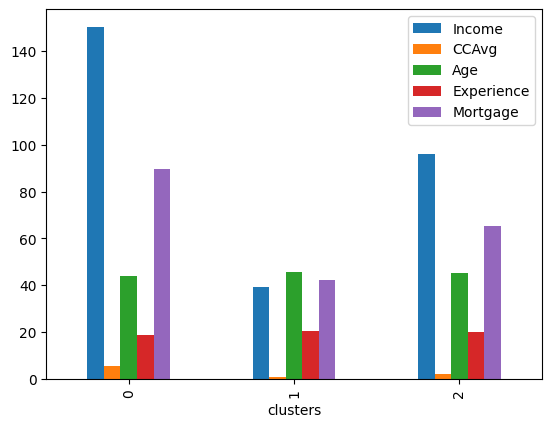

In [117]:
bank0.groupby('clusters')[cluster_cols].mean().plot.bar()

C:\Users\tempt\AppData\Local\Temp\ipykernel_16000\1713972078.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bank0.groupby('clusters')['Age','Income','CCAvg'].mean().plot.bar(color=['lightgray','darkgray','black'])


<AxesSubplot:xlabel='clusters'>

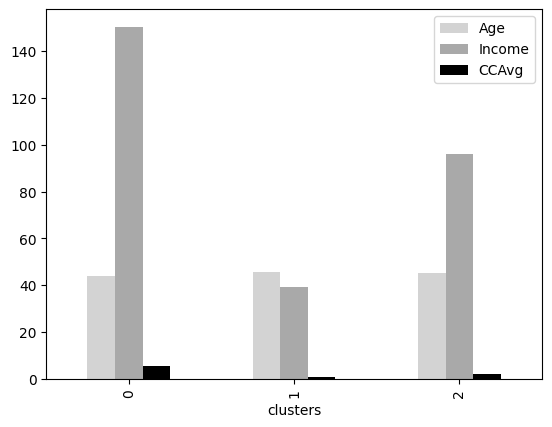

In [119]:
bank0.groupby('clusters')['Age','Income','CCAvg'].mean().plot.bar(color=['lightgray','darkgray','black'])

Cluster 0: Middle-aged penny pinchers (high income, low spend)

Cluster 1: Young high rollers (younger age, high income, high spend)

Cluster 2: Young aspirers (low income, high spend)

Cluster 3: Old average Joes (average income, average spend)